In [12]:
## NYC rental listing Data EDA project
## choose a question
## What determines the interest level of a property?
## How does proximity to Subways influence a rental’s price or interest level?
## What are the most common features of high, medium, and low interest properties? Does the description of the property influence interest level?


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import simplejson
from datetime import datetime, timedelta
import seaborn as sns
from collections import defaultdict

In [14]:
df = pd.read_json('train.json')

In [15]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [16]:
df['created'] = pd.to_datetime(df['created'])
df['year'] = df['created'].dt.year
df['month'] = df['created'].dt.month
df['day'] = df['created'].dt.day

In [17]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,year,month,day
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,2016,6,24
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,2016,6,12
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,2016,4,17
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,2016,4,18
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,2016,4,28


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 18 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null datetime64[ns]
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
year               49352 non-null int64
month              49352 non-null int64
day                49352 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(8)
memory usage: 7.2+ MB


In [19]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04,49352.0,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03,2016.0,5.014852,15.206881
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04,0.0,0.824442,8.280749
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01,2016.0,4.000000,1.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03,2016.0,4.000000,8.000000
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03,2016.0,5.000000,15.000000
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03,2016.0,6.000000,22.000000
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06,2016.0,6.000000,31.000000


In [20]:
df.dtypes

bathrooms                 float64
bedrooms                    int64
building_id                object
created            datetime64[ns]
description                object
display_address            object
features                   object
interest_level             object
latitude                  float64
listing_id                  int64
longitude                 float64
manager_id                 object
photos                     object
price                       int64
street_address             object
year                        int64
month                       int64
day                         int64
dtype: object

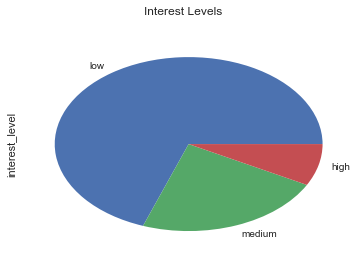

In [21]:
## Looking through the data, low interest takes up most of the listings
ax = df['interest_level'].value_counts().plot(kind='pie')
fig = ax.get_figure()
fig.suptitle('Interest Levels')
fig.savefig('interest_level_pie.png')

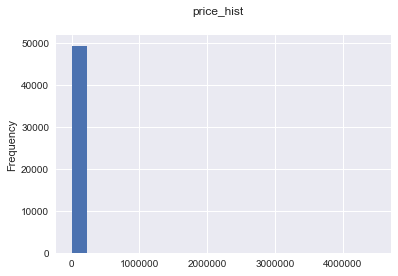

In [22]:
## Looking at listing prices, clear there are outliers so data needs cleaning
ax = df['price'].plot(kind='hist', bins=20)
fig = ax.get_figure()
fig.suptitle('price_hist')
fig.savefig('price_hist.png')

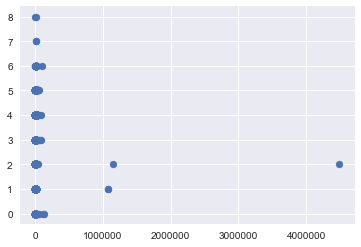

In [23]:
## Scatter to look at if amount of bedrooms effects price, still need to clean data
ax =plt.scatter(df['price'], df['bedrooms'])
fig = ax.get_figure()
fig.savefig('price_bedrooms_scatter.png')

In [24]:
df.count()

bathrooms          49352
bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
year               49352
month              49352
day                49352
dtype: int64

In [25]:
#lots of outliers in price, cut it down to get a better sense of data
df2 = df.loc[df['price'] <= 15000]

In [26]:
df2.count()

bathrooms          49096
bedrooms           49096
building_id        49096
created            49096
description        49096
display_address    49096
features           49096
interest_level     49096
latitude           49096
listing_id         49096
longitude          49096
manager_id         49096
photos             49096
price              49096
street_address     49096
year               49096
month              49096
day                49096
dtype: int64

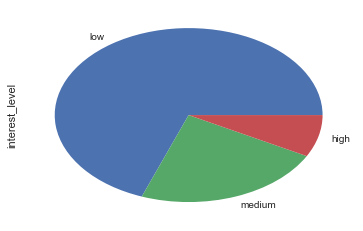

In [27]:
ax = df2['interest_level'].value_counts().plot(kind='pie')
fig = ax.get_figure()
fig.savefig('cleaned_interest_level_pie.png')

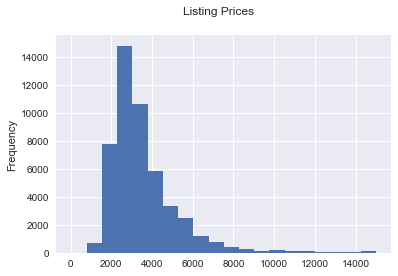

In [28]:
ax =df2['price'].plot(kind='hist', bins=20)
fig = ax.get_figure()
fig.suptitle('Listing Prices')
fig.savefig('cleaned_price_hist.png')

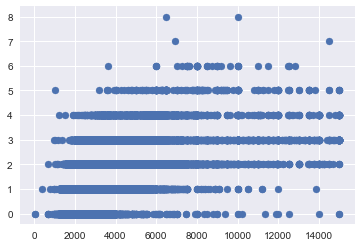

In [29]:
ax = plt.scatter(df2['price'], df2['bedrooms'])
fig = ax.get_figure()
fig.savefig('cleaned_price_bedrooms_scatter.png')

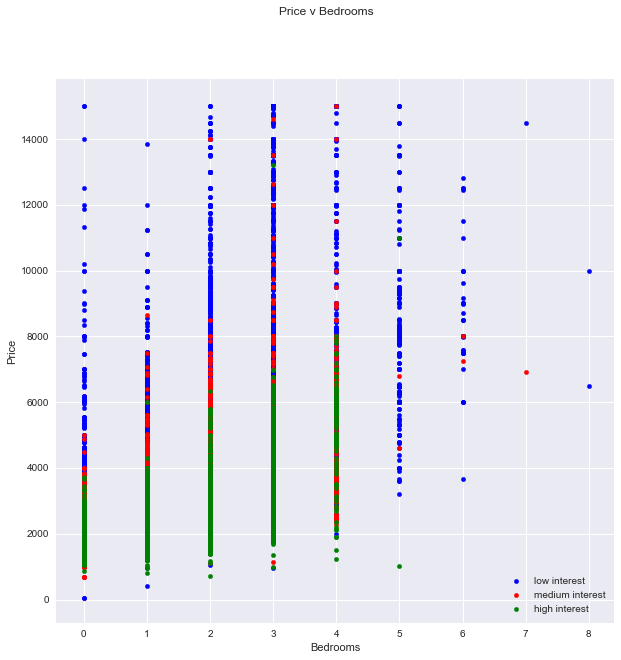

In [30]:
ax=df2[(df2['interest_level']=='low')].plot(kind='scatter', x='bedrooms', y='price',color='Blue', label='low interest',figsize=(10,10))
df2[(df2['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='bedrooms', y='price',color='Red', label='medium interest',figsize=(10,10))
df2[(df2['interest_level']=='high')].plot(kind='scatter', x='bedrooms', y='price',color='Green', label='high interest',ax=ax,figsize=(10,10))
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
fig = ax.get_figure()
fig.suptitle('Price v Bedrooms')
fig.savefig('Price vs Bedrooms.png')

In [31]:
#interest focused around lower price
#interest drops off after 4 bedrooms

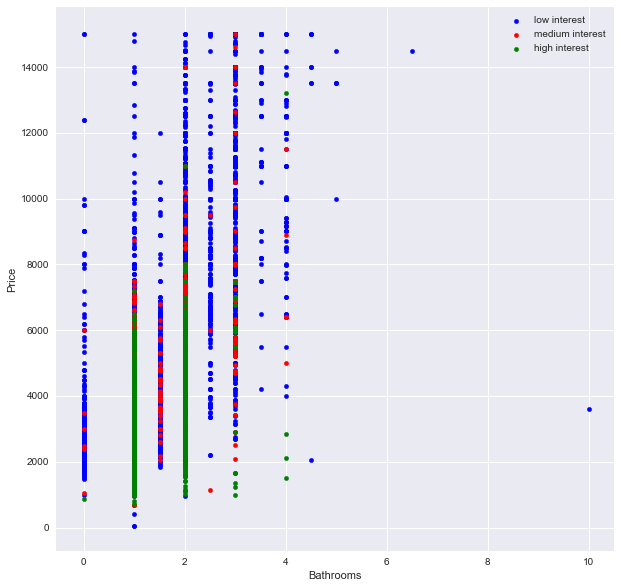

In [32]:
ax=df2[(df2['interest_level']=='low')].plot(kind='scatter', x='bathrooms', y='price',color='Blue', label='low interest',figsize=(10,10))
df2[(df2['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='bathrooms', y='price',color='Red', label='medium interest',figsize=(10,10))
df2[(df2['interest_level']=='high')].plot(kind='scatter', x='bathrooms', y='price',color='Green', label='high interest',ax=ax,figsize=(10,10))
ax.set_xlabel('Bathrooms')
ax.set_ylabel('Price')
fig = ax.get_figure()
fig.savefig('Price vs Bathrooms.png')

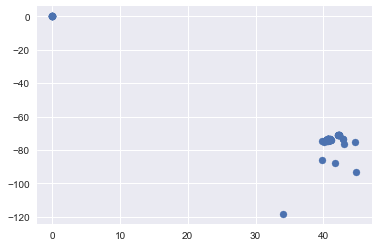

In [33]:
ax = plt.scatter(df2['latitude'], df2['longitude'])
#intial look at latitude and longitude data
#Need to remove extreme outliers
fig = ax.get_figure()
fig.savefig('lat_long_scatter')

In [34]:
df3 = df2.loc[df2['latitude'] >= 35]
df3 = df3.loc[df3['longitude'] <= -0]

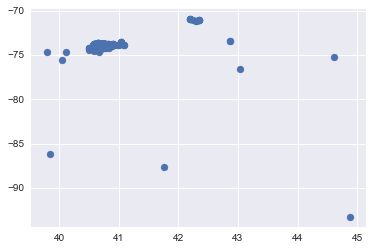

In [35]:
ax = plt.scatter(df3['latitude'], df3['longitude'])
fig = ax.get_figure()
fig.savefig('cleaned_lat_long.png')

In [36]:
#trying out geopy

In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
from geopy.distance import vincenty

In [38]:
subway_df = pd.read_csv('DOITT_SUBWAY_ENTRANCE_01_13SEPT2010.csv')

In [39]:
subway_df.head()

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5


In [40]:
subway_df['coords']=subway_df['the_geom'].str.split(' ').str.get(2).str.split(')').str.get(0)+','+subway_df['the_geom'].str.split(' ').str.get(1).str.split('(').str.get(1)
subway_longlat=list(subway_df['coords'])

In [41]:
subway_longlat[0:5]

['40.84916900104506,-73.86835600032798',
 '40.84912800131844,-73.86821300022677',
 '40.84122300105249,-73.87349900050798',
 '40.84145300067447,-73.8728919997833',
 '40.84081500075867,-73.87962300013866']

In [42]:
def get_closest_subdist(coord):
    min_dist=3000000
    for i in subway_longlat:
        if vincenty(coord, i).m <min_dist:
            min_dist=vincenty(coord, i).m
    return min_dist

In [43]:
df3['GeoC']=df3['latitude'].astype(str)+','+df3['longitude'].astype(str)

In [44]:
df_sample = df3.sample(frac=.02)

In [45]:
df_sample['cl_sub']=df_sample['GeoC'].apply(get_closest_subdist)

In [46]:
df_sample.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,year,month,day,GeoC,cl_sub
38457,1.0,0,cd759a988b8f23924b5a2058d5ab2b49,2016-06-25 04:03:12,Handsome Studio in Midtown. Dont be late to th...,E 56 Street,"[Doorman, Elevator, Laundry in Building, Hardw...",low,40.7575,7215459,-73.9626,a6aaa1f7ab69f66813fdf89ca1e6f685,[https://photos.renthop.com/2/7215459_de9bcd0c...,2645,405 E 56 Street,2016,6,25,"40.7575,-73.9626",551.371349
93121,1.0,1,d64510d4269e11e83acb1b93a6c43723,2016-04-26 03:13:05,*PRIME LOCATION-MIDTOWN EAST**- GREAT Value fo...,E 55 Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",high,40.7592,6925483,-73.9689,3e0c28a1f4b9c11b809ff21dbb920b5c,[https://photos.renthop.com/2/6925483_e57d2ff5...,2118,161 E 55 Street,2016,4,26,"40.7592,-73.9689",166.044005
21988,1.0,4,0,2016-06-28 19:56:29,A FABULOUS 4BR IN THE UPPER WEST SIDE!\r\r PER...,NO FEE! HOW ABOUT THIS UPPER WEST DELIGHT!,"[Elevator, Laundry In Building]",low,40.7994,7227835,-73.9591,4bdc3d8c1aaa90d997ce2cb77680679b,[https://photos.renthop.com/2/7227835_3461e2a7...,5100,W 108 & CENTRAL PARK,2016,6,28,"40.7994,-73.9591",69.337302
105546,1.0,1,11e1dec9d14b1a9e528386a2504b3afc,2016-04-07 03:13:10,This True 1 Bedroom apartment is renovated wit...,West St.,"[Doorman, Elevator, Fitness Center, Loft, Pre-...",low,40.7056,6838213,-74.0162,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6838213_50c3863a...,3171,1 West St.,2016,4,7,"40.7056,-74.0162",162.280929
104699,1.0,3,0,2016-04-14 03:24:41,*GUTTED KITCHEN*DISHWASHER*EXPOSED BRICK*Welco...,W 156th Street,"[prewar, dishwasher, Dogs Allowed, Cats Allowe...",low,40.8331,6871427,-73.9439,6d7e139b4582f175780c6e776311ccf6,[https://photos.renthop.com/2/6871427_875fd420...,2500,539 W 156th Street,2016,4,14,"40.8331,-73.9439",103.976953


In [47]:
df_sample['cl_sub'].describe()

count       982.000000
mean        587.736189
std        8954.262895
min           5.229986
25%         140.233214
50%         247.492354
75%         395.874886
max      280726.528362
Name: cl_sub, dtype: float64

In [48]:
df_wtf = df_sample[df_sample['cl_sub'] >= 1000]

In [49]:
df_wtf.head()
#obviously wrong lat longs

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,year,month,day,GeoC,cl_sub
85995,1.0,1,3eac933a57e386d7e11a479c40cc0dd4,2016-04-30 03:49:17,"corner unit. Lots of natural light, la...",30 Garrison Street,"[Elevator, Cats Allowed, Dogs Allowed]",low,42.3459,6946575,-71.0794,c090563865adf7dd1c953e9d6bd65318,[https://photos.renthop.com/2/6946575_d6515ca4...,3698,30 Garrison Street,2016,4,30,"42.3459,-71.0794",280726.528362
26740,2.0,3,8bfec0c6d542a29e0056957c6d74a52e,2016-06-11 06:14:43,Brand new construction between ave Y a...,East 29 Street,[],low,40.5922,7143394,-73.9415,6f63020874d0bac3287ec5cdf202e270,[https://photos.renthop.com/2/7143394_8db5b811...,2300,2470 East 29 Street,2016,6,11,"40.5922,-73.9415",1194.701599
46680,1.0,1,7c75fe4e7c9d17789eee3e8a86046b26,2016-05-15 02:49:35,Charming Fort Lee 1 Bedroom w/ West View - No ...,1350 15th Street,"[On-site Garage, On-site Parking Lot, Doorman,...",low,40.8452,7015819,-73.9809,9df32cb8dda19d3222d66e69e258616b,[https://photos.renthop.com/2/7015819_83b82d24...,1700,1350 15th Street,2016,5,15,"40.8452,-73.9809",3247.754070
55117,1.0,3,213ab7df611f11de43c9aeb6b350bfc8,2016-05-06 01:32:10,Three Bedroom 2nd floor apartment in a Bronx m...,East 222nd Street,[],medium,40.8824,6972462,-73.8503,ff52574a198d8a349f41d57bd374e8e9,[https://photos.renthop.com/2/6972462_04ef27b7...,2100,1101 East 222nd Street,2016,5,6,"40.8824,-73.8503",1035.445491
314,1.0,2,920cbea4c790314471335c3a64496c9e,2016-06-12 12:48:11,Check Out This Lovely Apartment Locate...,260th St,[],medium,40.7493,7151407,-73.7142,17c1a97107fcbd846a1e16b576b450f6,[https://photos.renthop.com/2/7151407_d6f0d7dc...,1900,74-21 260th St,2016,6,12,"40.7493,-73.7142",6998.850196


In [50]:
df_sample = df_sample[df_sample['cl_sub'] <= 5000]

In [51]:
df_sample.count()

bathrooms          980
bedrooms           980
building_id        980
created            980
description        980
display_address    980
features           980
interest_level     980
latitude           980
listing_id         980
longitude          980
manager_id         980
photos             980
price              980
street_address     980
year               980
month              980
day                980
GeoC               980
cl_sub             980
dtype: int64

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


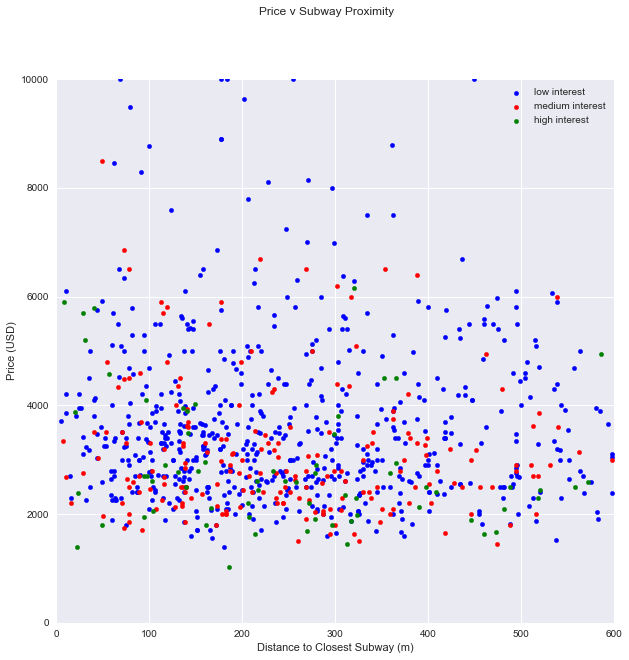

In [52]:
ax=df_sample[(df_sample['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='price',color='Blue', label='low interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000))
df_sample[(df_sample['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='price',color='Red', label='medium interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000))
df_sample[(df['interest_level']=='high')].plot(kind='scatter', x='cl_sub', y='price',color='Green', label='high interest',ax=ax,figsize=(10,10),xlim=(0,600),ylim=(0,10000))
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Price (USD)')
fig = ax.get_figure()
fig.suptitle('Price v Subway Proximity')
fig.savefig('price_subway_1.png')

In [53]:
## no clear relationship between interest and distance from subway - obviously wrong

In [54]:
#creating a scaled price per bed/bath
df_sample = df_sample[df_sample['bedrooms'] > 0] 
df_sample = df_sample[df_sample['bathrooms'] > 0] 

In [55]:
df_sample['scaled_price'] = df_sample.apply(lambda x: x['price'] / (x['bedrooms'] + x['bathrooms']),axis=1)
df_sample['scaled_price2']=df_sample.apply(lambda x:x['scaled_price']/x['cl_sub'],axis=1)

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


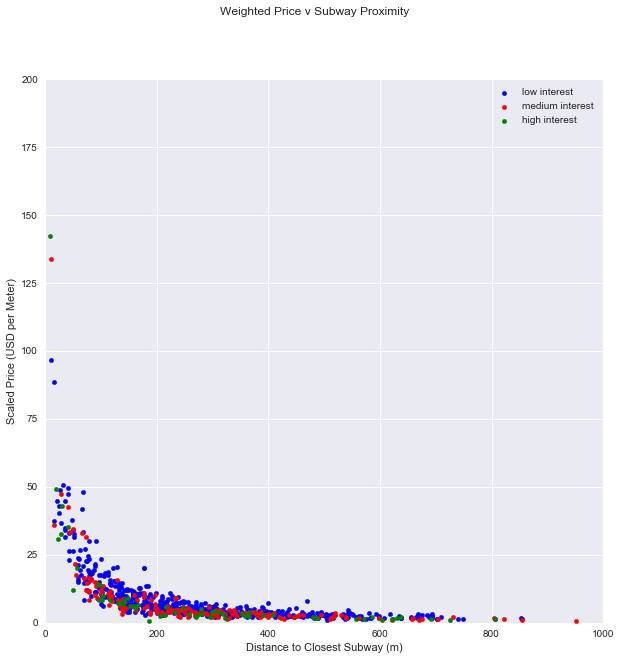

In [56]:
ax=df_sample[(df_sample['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Blue', label='low interest',figsize=(10,10),xlim=(0,1000),ylim=(0,200))
df_sample[(df_sample['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Red', label='medium interest',figsize=(10,10),xlim=(0,1000),ylim=(0,200))
df_sample[(df['interest_level']=='high')].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Green', label='high interest',ax=ax,figsize=(10,10),xlim=(0,1000),ylim=(0,200))
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per Meter)')
fig = ax.get_figure()
fig.suptitle('Weighted Price v Subway Proximity')
fig.savefig('price_subway_2.png')

/Users/JamesCassidy/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


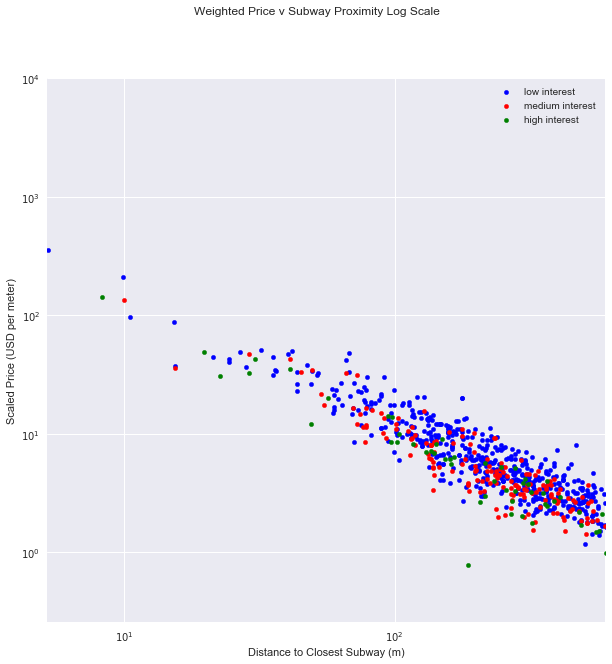

In [57]:
ax=df_sample[(df_sample['interest_level']=='low')].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Blue', label='low interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000), logy=1, logx=1)
df_sample[(df_sample['interest_level']=='medium')].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Red', label='medium interest',figsize=(10,10),xlim=(0,600),ylim=(0,10000),logy=1,logx=1)
df_sample[(df['interest_level']=='high')].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Green', label='high interest',ax=ax,figsize=(10,10),xlim=(0,600),ylim=(0,10000),logy=1,logx=1)
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per meter)')
fig = ax.get_figure()
fig.suptitle('Weighted Price v Subway Proximity Log Scale')
fig.savefig('price_subway_3.png')

In [58]:
## Lets check out the features
building_features = {}
for index, row in df3.iterrows():
        for i in row['features']:
            if i in building_features.keys():
                building_features[i] += 1
            if i not in building_features.keys():
                building_features[i] = 1
                

In [59]:
s2 = pd.DataFrame.from_dict(building_features, orient = 'index')

In [60]:
s2.columns = ['Count']

In [61]:
s2.head()

,Count
Doorman,20683
Elevator,25720
Fitness Center,13129
Cats Allowed,23420
Dogs Allowed,21917


In [62]:
s2 = s2[s2['Count'] > 1000]
s2.count()

Count    25
dtype: int64

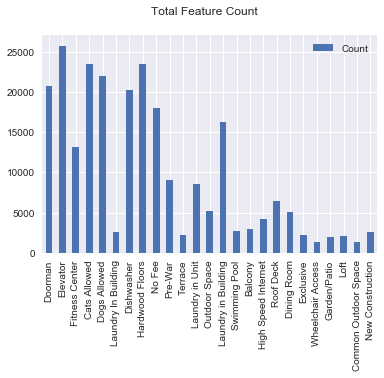

In [63]:
ax = s2.plot.bar()
fig = ax.get_figure()
fig.suptitle('Total Feature Count')
fig.savefig('total_feature_count.png')

In [64]:
def feature_counter(row):
    d = defaultdict(int)
    for index, row in df3.iterrows():
        for i in row['features']:
            d[i] += 1
    return d

In [65]:
## taking 10+ min
## df_sample['Feature_count'] = df_sample.apply(lambda x: feature_counter2(x), 1)

In [66]:
def doorman_finder(row):
    for index, row in df3.interrows():
        doorman_find = "Doorman" in row
    return doormanfind

In [67]:
df_sample['Doorman_True'] = df_sample['features'].apply(lambda x: "Doorman" in x, 1)

In [68]:
df_sample.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,price,street_address,year,month,day,GeoC,cl_sub,scaled_price,scaled_price2,Doorman_True
93121,1.0,1,d64510d4269e11e83acb1b93a6c43723,2016-04-26 03:13:05,*PRIME LOCATION-MIDTOWN EAST**- GREAT Value fo...,E 55 Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",high,40.7592,6925483,...,2118,161 E 55 Street,2016,4,26,"40.7592,-73.9689",166.044005,1059.0,6.377827,False
21988,1.0,4,0,2016-06-28 19:56:29,A FABULOUS 4BR IN THE UPPER WEST SIDE!\r\r PER...,NO FEE! HOW ABOUT THIS UPPER WEST DELIGHT!,"[Elevator, Laundry In Building]",low,40.7994,7227835,...,5100,W 108 & CENTRAL PARK,2016,6,28,"40.7994,-73.9591",69.337302,1020.0,14.710696,False
105546,1.0,1,11e1dec9d14b1a9e528386a2504b3afc,2016-04-07 03:13:10,This True 1 Bedroom apartment is renovated wit...,West St.,"[Doorman, Elevator, Fitness Center, Loft, Pre-...",low,40.7056,6838213,...,3171,1 West St.,2016,4,7,"40.7056,-74.0162",162.280929,1585.5,9.770094,True
104699,1.0,3,0,2016-04-14 03:24:41,*GUTTED KITCHEN*DISHWASHER*EXPOSED BRICK*Welco...,W 156th Street,"[prewar, dishwasher, Dogs Allowed, Cats Allowe...",low,40.8331,6871427,...,2500,539 W 156th Street,2016,4,14,"40.8331,-73.9439",103.976953,625.0,6.010947,False
86175,1.0,1,c20fa2156d03512b758fbb3a79c65837,2016-04-26 02:56:09,Live like a SUPERHERO in your new renovated fl...,First Avenue,"[Elevator, Hardwood Floors]",low,40.7713,6925156,...,2500,1483 First Avenue,2016,4,26,"40.7713,-73.9538",476.738285,1250.0,2.621984,False


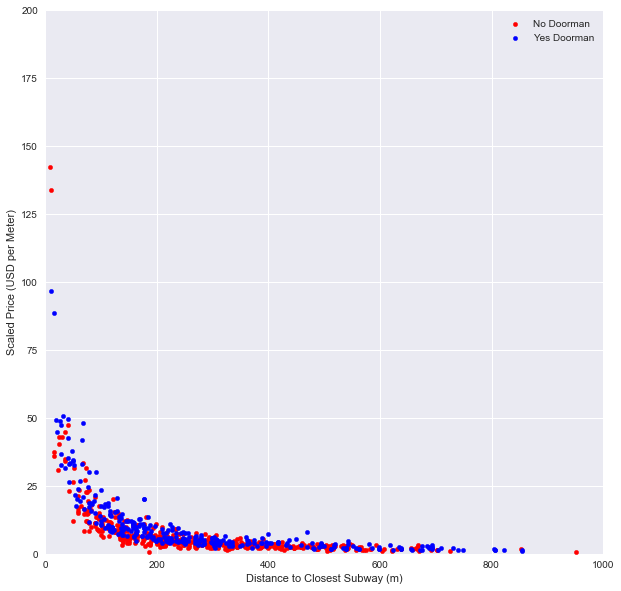

In [69]:
ax=df_sample[(df_sample['Doorman_True']==False)].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Red', label='No Doorman',figsize=(10,10),xlim=(0,1000),ylim=(0,200))
df_sample[(df_sample['Doorman_True']==True)].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Blue', label='Yes Doorman',figsize=(10,10),xlim=(0,1000),ylim=(0,200))
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per Meter)')
fig = ax.get_figure()


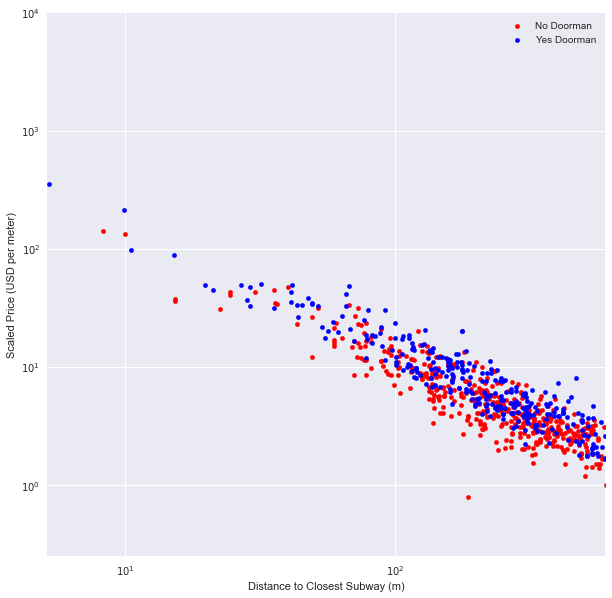

In [70]:
ax=df_sample[(df_sample['Doorman_True']==False)].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Red', label='No Doorman',figsize=(10,10),xlim=(0,600),ylim=(0,10000), logy=1, logx=1)
df_sample[(df_sample['Doorman_True']==True)].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Blue', label='Yes Doorman',figsize=(10,10),xlim=(0,600),ylim=(0,10000),logy=1,logx=1)
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per meter)')
fig = ax.get_figure()

In [71]:
df_sample['NoFee_True'] = df_sample['features'].apply(lambda x: "No Fee" in x, 1)

In [72]:
df_sample['DogsAllowed_True'] = df_sample['features'].apply(lambda x: "Dogs Allowed" in x, 1)

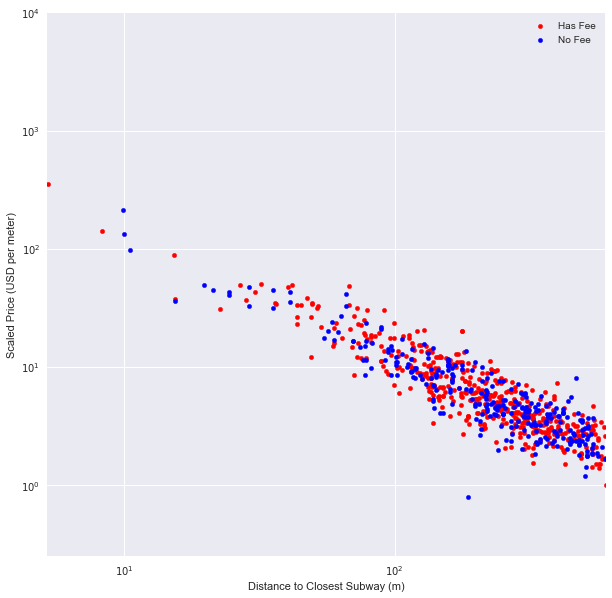

In [73]:
ax=df_sample[(df_sample['NoFee_True']==False)].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Red', label='Has Fee',figsize=(10,10),xlim=(0,600),ylim=(0,10000), logy=1, logx=1)
df_sample[(df_sample['NoFee_True']==True)].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Blue', label='No Fee',figsize=(10,10),xlim=(0,600),ylim=(0,10000),logy=1,logx=1)
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per meter)')
fig = ax.get_figure()

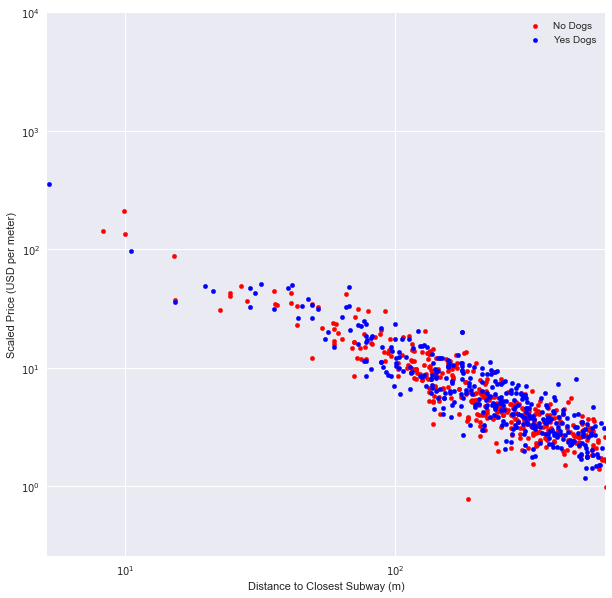

In [74]:
ax=df_sample[(df_sample['DogsAllowed_True']==False)].plot(kind='scatter', x='cl_sub', y='scaled_price2',color='Red', label='No Dogs',figsize=(10,10),xlim=(0,600),ylim=(0,10000), logy=1, logx=1)
df_sample[(df_sample['DogsAllowed_True']==True)].plot(kind='scatter',ax=ax, x='cl_sub', y='scaled_price2',color='Blue', label='Yes Dogs',figsize=(10,10),xlim=(0,600),ylim=(0,10000),logy=1,logx=1)
ax.set_xlabel('Distance to Closest Subway (m)')
ax.set_ylabel('Scaled Price (USD per meter)')

fig = ax.get_figure()

In [75]:
feature_list = list(s2.index.values) 

In [76]:
len(feature_list)

25

In [77]:
for feature in feature_list:
    df_sample[feature] = df_sample['features'].apply(lambda x: feature in x, 1)

In [78]:
df_sample.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,...,Balcony,High Speed Internet,Roof Deck,Dining Room,Exclusive,Wheelchair Access,Garden/Patio,Loft,Common Outdoor Space,New Construction
93121,1.0,1,d64510d4269e11e83acb1b93a6c43723,2016-04-26 03:13:05,*PRIME LOCATION-MIDTOWN EAST**- GREAT Value fo...,E 55 Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",high,40.7592,6925483,...,False,False,False,False,False,False,False,False,False,False
21988,1.0,4,0,2016-06-28 19:56:29,A FABULOUS 4BR IN THE UPPER WEST SIDE!\r\r PER...,NO FEE! HOW ABOUT THIS UPPER WEST DELIGHT!,"[Elevator, Laundry In Building]",low,40.7994,7227835,...,False,False,False,False,False,False,False,False,False,False
105546,1.0,1,11e1dec9d14b1a9e528386a2504b3afc,2016-04-07 03:13:10,This True 1 Bedroom apartment is renovated wit...,West St.,"[Doorman, Elevator, Fitness Center, Loft, Pre-...",low,40.7056,6838213,...,False,False,False,False,False,False,False,True,False,False
104699,1.0,3,0,2016-04-14 03:24:41,*GUTTED KITCHEN*DISHWASHER*EXPOSED BRICK*Welco...,W 156th Street,"[prewar, dishwasher, Dogs Allowed, Cats Allowe...",low,40.8331,6871427,...,False,False,False,False,False,False,False,False,False,False
86175,1.0,1,c20fa2156d03512b758fbb3a79c65837,2016-04-26 02:56:09,Live like a SUPERHERO in your new renovated fl...,First Avenue,"[Elevator, Hardwood Floors]",low,40.7713,6925156,...,False,False,False,False,False,False,False,False,False,False


In [79]:
df_sample['scaled_price2'].corr(df_sample['Doorman'])

0.12280004846301425

In [80]:
df5 = df2.filter(['interest_level', 'features'], axis=1)

In [81]:
df5.head()

,interest_level,features
10,medium,[]
10000,low,"[Doorman, Elevator, Fitness Center, Cats Allow..."
100004,high,"[Laundry In Building, Dishwasher, Hardwood Flo..."
100007,low,"[Hardwood Floors, No Fee]"
100013,low,[Pre-War]


In [82]:
df_low = df5[df5['interest_level'] == 'low']
df_med = df5[df5['interest_level'] == 'medium']
df_high = df5[df5['interest_level'] == 'high']

In [83]:
def feature_counter2(x_df):
    building_features = {}
    for index, row in x_df.iterrows():
        for i in row['features']:
            if i in building_features.keys():
                building_features[i] += 1
            if i not in building_features.keys():
                building_features[i] = 1
    temp_df = pd.DataFrame.from_dict(building_features, orient = 'index')
    temp_df.columns = ['Count']
    temp_df = temp_df[temp_df['Count'] > 500]

    return temp_df

In [84]:
df_high.count()

interest_level    3838
features          3838
dtype: int64

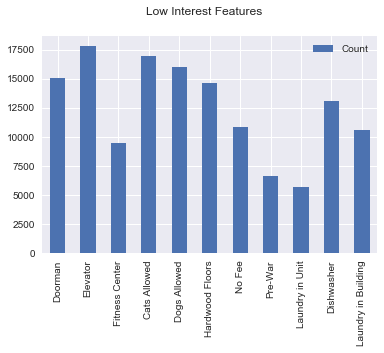

In [85]:
df_low_features = feature_counter2(df_low)
df_low_features = df_low_features[df_low_features['Count'] > 5000]
ax = df_low_features.plot.bar()
fig = ax.get_figure()
fig.suptitle('Low Interest Features')
fig.savefig('low_feature_counts.png')

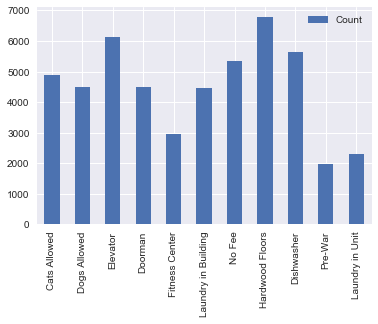

In [86]:
df_med_features = feature_counter2(df_med)
df_med_features = df_med_features[df_med_features['Count'] > 1800]
ax = df_med_features.plot.bar()
fig = ax.get_figure()
fig.savefig('med_feature_counts.png')

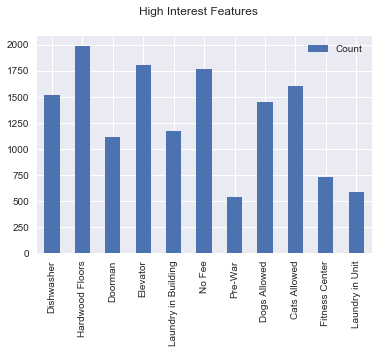

In [87]:
df_high_features = feature_counter2(df_high)
ax = df_high_features.plot.bar()
fig = ax.get_figure()
fig.suptitle('High Interest Features')
fig.savefig('high_feature_counts.png')

In [88]:
df_low_features = df_low_features.rename(columns={'Count': 'Count_Low'})
df_med_features = df_med_features.rename(columns={'Count': 'Count_Med'})
df_high_features = df_high_features.rename(columns={'Count': 'Count_High'})

In [89]:
df_final = df_low_features.join(df_med_features).join(df_high_features)

In [90]:
df_final.head()

,Count_Low,Count_Med,Count_High
Doorman,15077,4498,1110
Elevator,17794,6123,1806
Fitness Center,9430,2969,732
Cats Allowed,16954,4872,1601
Dogs Allowed,15971,4499,1453


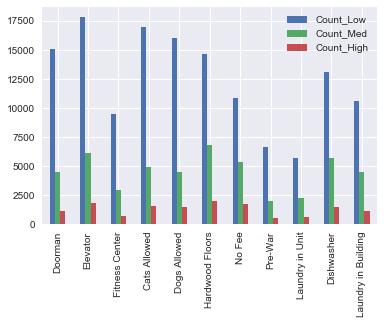

In [91]:
ax = df_final.plot.bar()
fig = ax.get_figure()
fig.savefig('raw_feature_final.png')

In [92]:
low_count = df_final['Count_Low'].sum()
med_count = df_final['Count_Med'].sum()
high_count = df_final['Count_High'].sum()
print(low_count)
print(med_count)
print(high_count)

136714
49458
14265


In [93]:
df_final['Count_Low'] = df_final['Count_Low'].apply(lambda x: x/low_count)
df_final['Count_Med'] = df_final['Count_Med'].apply(lambda x: x/med_count)
df_final['Count_High'] = df_final['Count_High'].apply(lambda x: x/high_count)

In [94]:
df_final.head()

,Count_Low,Count_Med,Count_High
Doorman,0.110281,0.090946,0.077813
Elevator,0.130155,0.123802,0.126604
Fitness Center,0.068976,0.060031,0.051314
Cats Allowed,0.124011,0.098508,0.112233
Dogs Allowed,0.116821,0.090966,0.101858


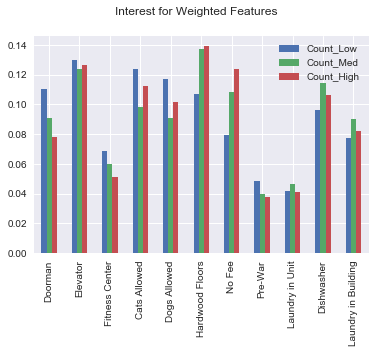

In [95]:
ax = df_final.plot.bar()
fig = ax.get_figure()
fig.suptitle('Interest for Weighted Features')
fig.savefig('adj_feature_final.png')

In [96]:
#Looks like No Fee listings are the most likely to recieve High interest
#Looks like Medium and High interest listings are more likely to have Hardwood Floors and a dishwasher
#Doorman does not appear to add much interest to a listing